# Stackoverflow Survey 2020

In [ ]:
I am pythonist,so I have analysed stackoverflow survey on the basis of python.
The most import thing I am always interested on stackoverflow survey is the programming languages that
each respondent know.I mean to say most popular languages.

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from simple_colors import*
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('survey_results_public.csv')
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [3]:
#shape of data
df.shape

(64461, 61)

In [4]:
#na value check
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [5]:
#check for unique value in each column
df.apply(lambda x:len(x.unique()))

Respondent            64461
MainBranch                6
Hobbyist                  3
Age                     111
Age1stCode               64
                      ...  
WebframeWorkedWith     3790
WelcomeChange             7
WorkWeekHrs             158
YearsCode                53
YearsCodePro             53
Length: 61, dtype: int64

In [6]:
# these are the columns which have na value
print(red(f' {len([col for col in df.columns if df[col].isna().any()])} columns has na values','bold'))
[col for col in df.columns if df[col].isna().any()]

 60 columns has na values


['MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'WorkWeekHrs',
 '

In [7]:
# percentage of respondent who know python
data=df.LanguageWorkedWith.str.contains('Python').sum()/df.shape[0]
print(blue(f'Percentage of respondent who know python {round(data*100,2)}','bold'))

Percentage of respondent who know python 39.23


# Genderwise who know python

In [8]:
#filter
mask=df.LanguageWorkedWith.notnull()
df=df[mask]
#putting python in the filter
mask1=df.LanguageWorkedWith.str.contains('Python')
df1=df.loc[mask1,:]
df2=df1.Gender.value_counts()
df2

Man                                                            20227
Woman                                                           1581
Non-binary, genderqueer, or gender non-conforming                213
Man;Non-binary, genderqueer, or gender non-conforming             67
Woman;Non-binary, genderqueer, or gender non-conforming           52
Woman;Man                                                         25
Woman;Man;Non-binary, genderqueer, or gender non-conforming       13
Name: Gender, dtype: int64

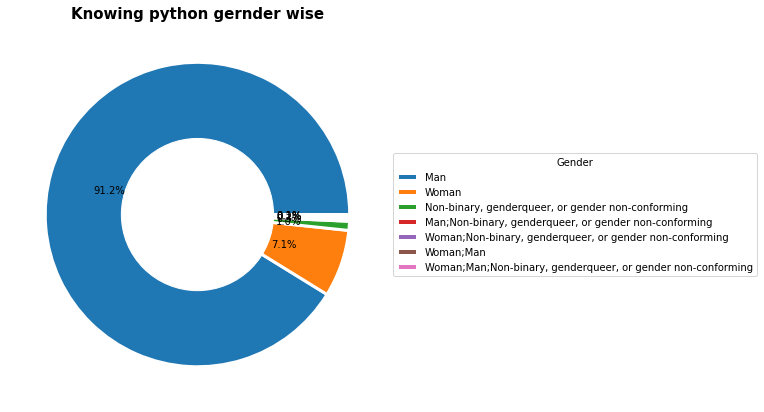

In [9]:
# create data
names =df2.index
size =df2
plt.figure(figsize=(10,7))
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Knowing python gernder wise',fontweight='bold',fontsize=15)
plt.legend(names,
          title="Gender",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));

# Top 15 respondents in stackoverflow survey 2020

In [14]:
df.groupby('Country')['Country'].agg('count')
df1=df.Country.value_counts().head(15)
df1=df1.reset_index()
df1.columns=['country','Total Respondents']
df1=df1.sort_values(by='Total Respondents',ascending=False)
df1

,country,Total Respondents
0,United States,11633
1,India,6884
2,Germany,3633
3,United Kingdom,3616
4,Canada,2038
5,France,1724
6,Brazil,1611
7,Netherlands,1261
8,Poland,1163
9,Australia,1123


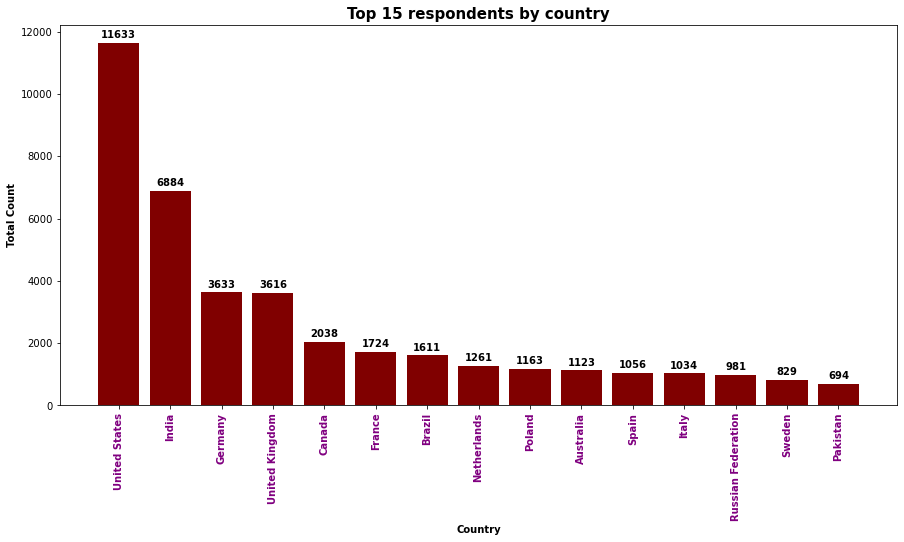

In [15]:
plt.figure(figsize=(15,7))
plt.bar(x=df1['country'],height=df1['Total Respondents'],color='maroon')
ys=df1['Total Respondents']
xs=df1['country']
for xs,ys in zip(xs,ys):
    label = "{}".format(ys)

    plt.annotate(label, # this is the text
                 (xs,ys), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontweight='bold') 
plt.xticks(rotation='vertical',fontweight='bold',color='purple')
plt.title('Top 15 respondents by country',fontweight='bold',fontsize=15)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Total Count',fontweight='bold');

# most popular languages among respondents

In [17]:
#lets see language worked with columns
#I will split this column by ; so that i can extract each language individually,which i will add
df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
4                                        HTML/CSS;Ruby;SQL
5                                 HTML/CSS;Java;JavaScript
                               ...                        
64447                    C#;HTML/CSS;Java;JavaScript;Swift
64453                                         C++;HTML/CSS
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 57378, dtype: object

In [47]:
#filter
mask=df.LanguageWorkedWith.notnull()
#initialising empty dictionary
d=dict()
#splitting  string by (;)
for item in df.loc[mask,'LanguageWorkedWith'].str.split(';'):
    for each_item in item:
        if each_item in d:
            d[each_item]+=1
        else:
            d[each_item]=1
d
   

{'C#': 18041,
 'HTML/CSS': 36181,
 'JavaScript': 38822,
 'Swift': 3397,
 'Objective-C': 2340,
 'Python': 25287,
 'Ruby': 4046,
 'SQL': 31413,
 'Java': 23074,
 'PHP': 15007,
 'C': 12487,
 'TypeScript': 14578,
 'Bash/Shell/PowerShell': 18980,
 'Kotlin': 4468,
 'R': 3288,
 'VBA': 3499,
 'Perl': 1796,
 'Scala': 2052,
 'C++': 13707,
 'Go': 5038,
 'Haskell': 1222,
 'Rust': 2929,
 'Dart': 2280,
 'Julia': 519,
 'Assembly': 3553}

In [59]:
#changig above dictionary into percentage( in descending order) 
final={k:round((v/df.shape[0])*100,2) for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
final

{'JavaScript': 60.23,
 'HTML/CSS': 56.13,
 'SQL': 48.73,
 'Python': 39.23,
 'Java': 35.8,
 'Bash/Shell/PowerShell': 29.44,
 'C#': 27.99,
 'PHP': 23.28,
 'TypeScript': 22.62,
 'C++': 21.26,
 'C': 19.37,
 'Go': 7.82,
 'Kotlin': 6.93,
 'Ruby': 6.28,
 'Assembly': 5.51,
 'VBA': 5.43,
 'Swift': 5.27,
 'R': 5.1,
 'Rust': 4.54,
 'Objective-C': 3.63,
 'Dart': 3.54,
 'Scala': 3.18,
 'Perl': 2.79,
 'Haskell': 1.9,
 'Julia': 0.81}

In [68]:
#changing dictionary to dataframe
df=pd.DataFrame(list(final.items()))
df.columns=['Language','% People']
df=df.sort_values(by='% People',ignore_index=True)
df


,Language,% People
0,Julia,0.81
1,Haskell,1.90
2,Perl,2.79
3,Scala,3.18
4,Dart,3.54
5,Objective-C,3.63
6,Rust,4.54
7,R,5.10
8,Swift,5.27
9,VBA,5.43


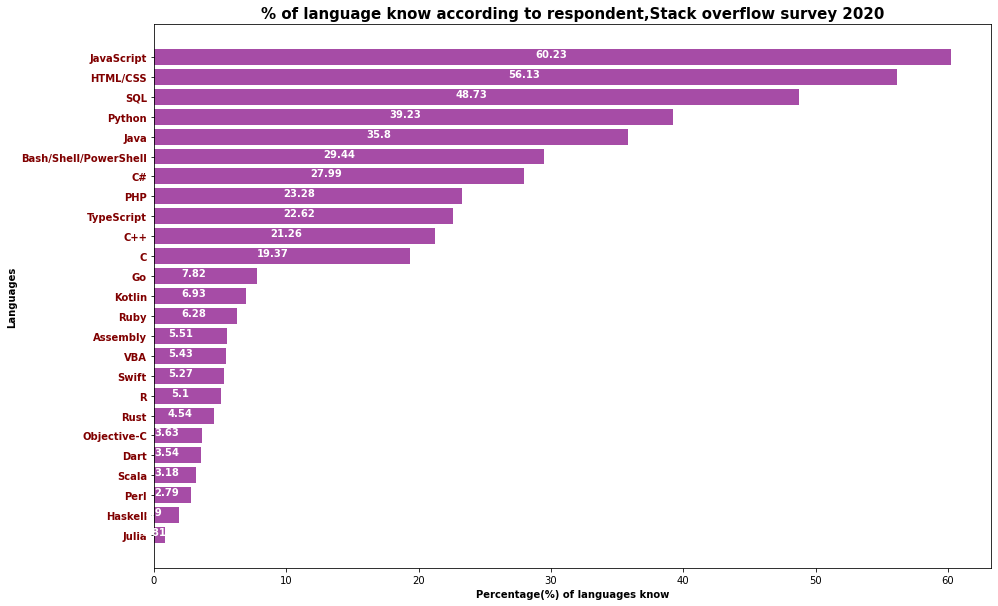

In [69]:
plt.figure(figsize=(15,10))
x=df['% People']
y=df['Language']
for i in range(len(y)):
        plt.text(x[i]//2, y[i],x[i], ha = 'center',fontweight='bold',color='white')
plt.barh(y,x, color = 'purple',alpha=0.7)
plt.title('% of language know according to respondent,Stack overflow survey 2020',fontweight='bold',fontsize=15)
plt.ylabel('Languages',fontweight='bold')
plt.xlabel('Percentage(%) of languages know',fontweight='bold')
plt.yticks(fontweight='bold',color='maroon');
    

In [ ]:
So,JavaScript and HTML/CSS are the most popular programming languages according to stackoverflow survey

# Handling Nan value in numeric columns

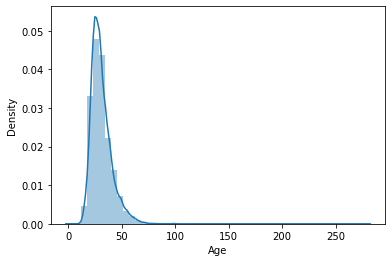

In [9]:
# distribution plot which is right skewed
import seaborn as sns
sns.distplot(df.Age);

In [158]:
#positive skew
df.Age.skew()

1.6271347447357685

In [136]:
#making filter
mask1=df.Age>60


In [142]:
#checking for Nan value in Age columns
df.Age.isna().sum()

19015

In [147]:
#numnber of the rows which has  age greater  than 60. 
(df.Age>60).sum()

518

In [268]:

#number of the rows which has  age less  than 15. 
(df.Age<15).sum()

219

In [ ]:
For this analysis,I will remove any age greater than 60 and less than 15.

In [256]:
#filter
mask=(df.Age>60) | (df.Age<15) #filter
df1=df.loc[~mask,'Age'] #negate filter
#filling nan value with median as it is least affected
df1=df1.fillna(df1.median())
#making bins of age range
df1['bins']=pd.cut(df1,bins=[15,20,25,30,35,40,50,60],right=True)
df1=df1.bins.value_counts()
df1

(25, 30]    30785
(20, 25]    10700
(30, 35]     7887
(35, 40]     5054
(40, 50]     4192
(15, 20]     3415
(50, 60]     1460
Name: Age, dtype: int64

In [257]:
df1=df1.reset_index()
df1.columns=['Age_range','Count']
df1

,Age_range,Count
0,"(25, 30]",30785
1,"(20, 25]",10700
2,"(30, 35]",7887
3,"(35, 40]",5054
4,"(40, 50]",4192
5,"(15, 20]",3415
6,"(50, 60]",1460


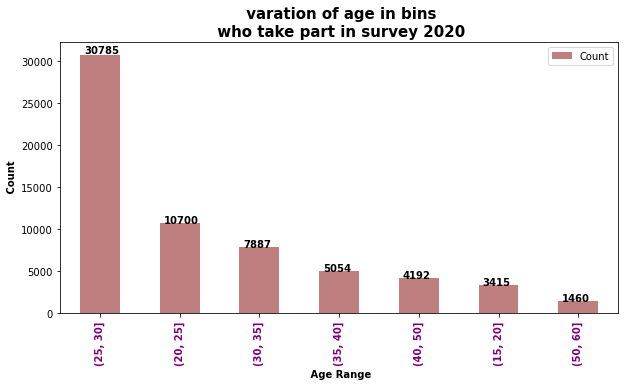

In [265]:
ax=df1.plot(x='Age_range',kind='bar',alpha=0.5,figsize=(10,5),color='maroon')
plt.xlabel(' Age Range',fontweight='bold')
plt.title(' varation of age in bins\n who take part in survey 2020',fontweight='bold',fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.05 * 1.005, p.get_height()* 1.005),fontweight='bold')

plt.xticks(color='purple',fontweight='bold')
plt.ylabel(' Count',fontweight='bold');

In [ ]:
So,most of the respondents where age between 25-30 in survey

# Education level,who know python

In [282]:
mask=df.EdLevel.notnull()
df=df[mask]
mask1=df.LanguageWorkedWith.str.contains('Python')
df1=df.loc[mask1,'EdLevel']
df1=df1.value_counts()
df1=df1.reset_index()
df1.columns=['Education level','Total_count']
df1

,Education level,Total_count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10318
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5705
2,Some college/university study without earning ...,2898
3,"Secondary school (e.g. American high school, G...",2271
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",1049
5,"Associate degree (A.A., A.S., etc.)",615
6,Primary/elementary school,484
7,"Professional degree (JD, MD, etc.)",254
8,I never completed any formal education,144


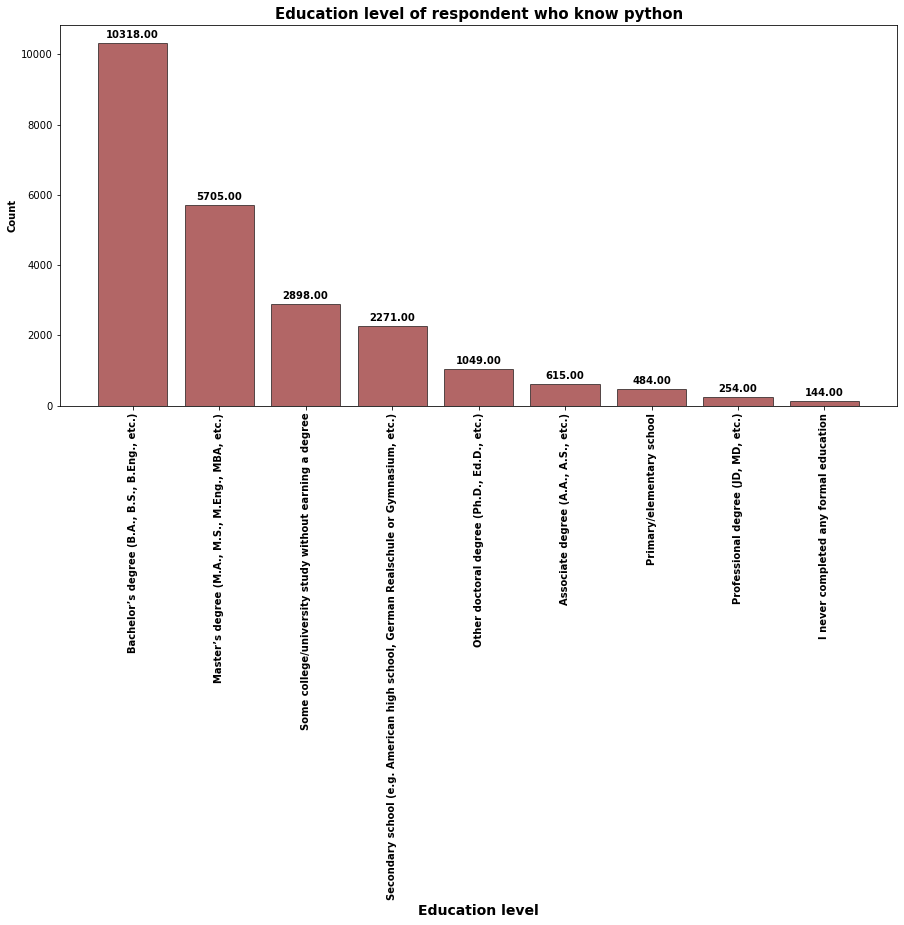

In [295]:
plt.figure(figsize=(15,7))

# using some dummy data for this example
xs=df1['Education level']
ys=df1.Total_count

plt.bar(xs,ys,color='maroon',alpha=.6,edgecolor='black')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontweight='bold') 
plt.xticks(rotation='vertical',fontweight='bold')
plt.xlabel('Education level',fontweight='bold',fontsize=14)
plt.title('Education level of respondent who know python',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontweight='bold');

In [ ]:
So,most of the respondent were bachlore pass